In [2]:
from qiskit import *

In [3]:
from qiskit.visualization import *

In [5]:
from qiskit.circuit.library import QFT

In [14]:
from numpy import *

In [8]:
backend = BasicAer.get_backend('qasm_simulator')

In [44]:
peT = QuantumCircuit(3)

In [45]:
peT.add_register(QuantumRegister(1,'qr'))

In [46]:
peT.add_register(ClassicalRegister(3))

In [47]:
peT.x(3)

In [48]:
for qubit in range(3):
    peT.h(qubit)

In [49]:
peT.draw()

┌───┐
 q_0: ┤ H ├
      ├───┤
 q_1: ┤ H ├
      ├───┤
 q_2: ┤ H ├
      ├───┤
qr_0: ┤ X ├
      └───┘
c4: 3/═════

In [50]:
repetitions = 1

In [51]:
for counting_qubit in range(3):
    for i in range(repetitions):
        peT.cp(pi/4, counting_qubit, 3)
    repetitions *= 2

In [52]:
peT.draw()

┌───┐                                                               
 q_0: ┤ H ├─■─────────────────────────────────────────────────────────────
      ├───┤ │                                                             
 q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────
      ├───┤ │        │        │                                           
 q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────
      ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) 
qr_0: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────
      └───┘                                                               
c4: 3/════════════════════════════════════════════════════════════════════

In [53]:
qftinv = QFT(3, inverse=True)

In [54]:
qftinv.draw()

┌───┐                                        
q_0: ─X─┤ H ├─■──────────────■───────────────────────
      │ └───┘ │P(-π/2) ┌───┐ │                       
q_1: ─┼───────■────────┤ H ├─┼─────────■─────────────
      │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐
q_2: ─X──────────────────────■─────────■────────┤ H ├
                                                └───┘

In [55]:
qftinv.add_register(QuantumRegister(1,'qr'))

In [56]:
qftinv.add_register(ClassicalRegister(3))

In [57]:
qftinv.draw()

┌───┐                                        
 q_0: ─X─┤ H ├─■──────────────■───────────────────────
       │ └───┘ │P(-π/2) ┌───┐ │                       
 q_1: ─┼───────■────────┤ H ├─┼─────────■─────────────
       │                └───┘ │P(-π/4)  │P(-π/2) ┌───┐
 q_2: ─X──────────────────────■─────────■────────┤ H ├
                                                 └───┘
qr_0: ────────────────────────────────────────────────
                                                      
c5: 3/════════════════════════════════════════════════

In [58]:
peT = peT + qftinv

In [59]:
peT.draw()

┌───┐                                                                  »
 q_0: ┤ H ├─■──────────────────────────────────────────────────────────────X─»
      ├───┤ │                                                              │ »
 q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────┼─»
      ├───┤ │        │        │                                            │ »
 q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────X─»
      ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)    »
qr_0: ┤ X ├─■────────■────────■────────■────────■────────■────────■──────────»
      └───┘                                                                  »
c4: 3/═══════════════════════════════════════════════════════════════════════»
                                                                             »
c5: 3/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌───┐                                        
« q_0: ┤ H ├─■──────────────■───────────────────────
«      └───┘ │P(-π/2) ┌───┐ │                       
« q_1: ──────■────────┤ H ├─┼─────────■─────────────
«                     └───┘ │P(-π/4)  │P(-π/2) ┌───┐
« q_2: ─────────────────────■─────────■────────┤ H ├
«                                              └───┘
«qr_0: ─────────────────────────────────────────────
«                                                   
«c4: 3/═════════════════════════════════════════════
«                                                   
«c5: 3/═════════════════════════════════════════════
«

In [60]:
for i in range(3):
    peT.measure(i,i)

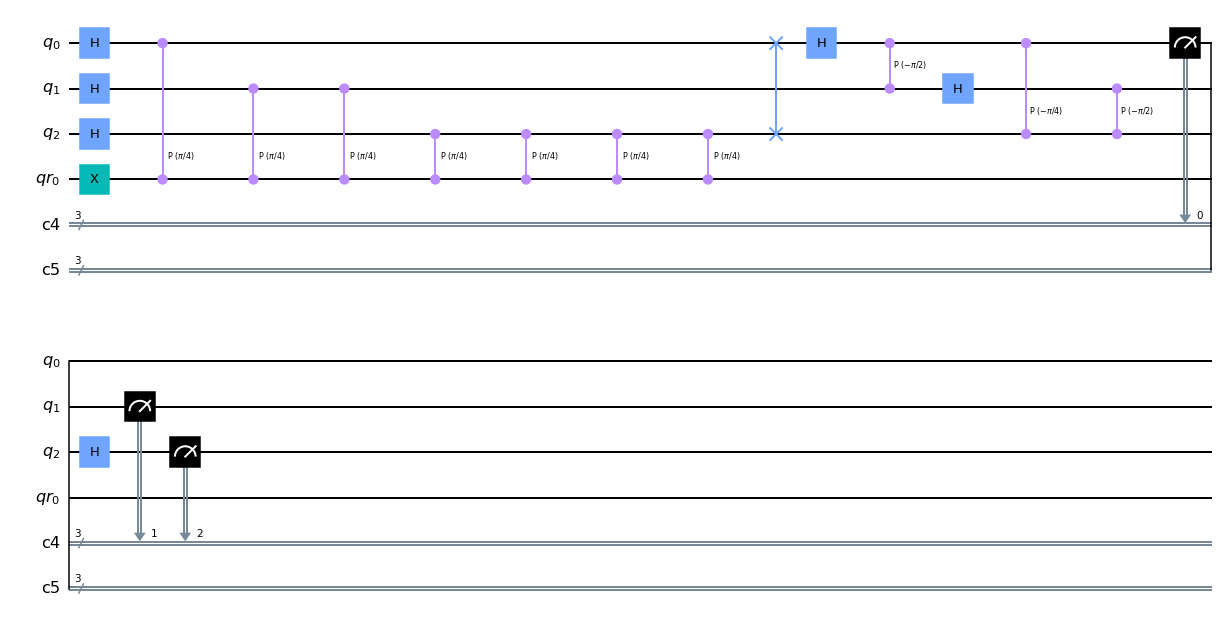

In [62]:
peT.draw(output='mpl')

In [63]:
t_peT = transpile(peT, backend)

In [64]:
peTobj = assemble(t_peT, shots = 2048)

In [65]:
results = backend.run(peTobj).result()

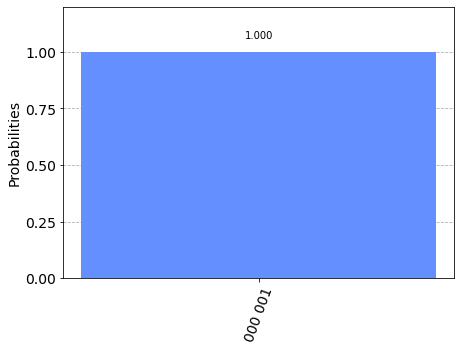

In [66]:
plot_histogram(results.get_counts())